# 13 - Testy różnic

<center>
<img src="img/2sample.png" alt="Testy różnic" width="500"/>
</center>

## Idea estymatora różnic między parametrami

Różnicę między dwiema średnimi estymujemy jako różnicę ich estymatorów. Dla dwóch niezależnych prób estymatorem jest:
$$\hat{\delta} = \bar X_1 - \bar X_2$$
a dla danych parami najpierw liczymy różnice w parach $D_i = X_{1i} - X_{2i}$, a następnie średnią tych różnic $\overline{D}$.

## Liniowość i nieobciążoność

Dzięki liniowości wartości oczekiwanej mamy: $$E(\bar X_1 - \bar X_2) = \mu_1 - \mu_2$$ Oznacza to, że estymator jest nieobciążony — jego wartość oczekiwana równa jest prawdziwej różnicy średnich.

To podstawowy powód, dla którego różnicę średnich traktujemy bezpośrednio jako estymator interesującej wielkości.

## Suma wariancji — intuicja

Dla dwóch niezależnych zmiennych losowych A i B mamy: $$Var(A - B) = Var(A) + Var(B) - 2Cov(A,B)$$

Jeśli A i B są niezależne, $Cov(A,B)=0$, więc wariancja różnicy to po prostu suma wariancji.
Dla średnich z prób: $$Var(\bar X_j) = \sigma_j^2 / n_j$$ stąd
$$Var(\bar X_1 - \bar X_2) = \sigma_1^2 / n_1 + \sigma_2^2 / n_2$$

Analogicznie dla proporcji: $$Var(\hat p) = p(1-p)/n$$ a różnica dwóch niezależnych proporcji ma wariancję będącą sumą tych składników.

## Parowane obserwacje i praktyczne uwagi

Gdy obserwacje są sparowane (te same jednostki w dwóch warunkach), kowariancja między pomiarami nie jest zerowa.

Dla różnicy w parach $$Var(D) = Var(X_1) + Var(X_2) - 2Cov(X_1,X_2)$$ 

Dodatnia kowariancja zmniejsza wariancję różnic, dlatego test parowany bywa bardziej czuły niż test dla dwóch niezależnych grup.

W praktyce zamiast nieznanych $σ^2$ podstawiamy estymatory z próby ($s^2$). Jeśli zakładamy równość wariancji używamy wariancji zgrupowanej (pooled), a jeśli nie — wersji Welcha (oddzielne wariancje).

Zastosowanie centralnego twierdzenia granicznego (CLT) uzasadnia przybliżenie rozkładem normalnym dla średnich i proporcji, co pozwala konstruować przedziały ufności i testy.

---

## Testy różnic między średnimi 

Celem testu jest sprawdzenie hipotezy o różnicy średnich (np. $H_0: \mu_1 - \mu_2 = 0$). W zależności od układu danych rozważamy:

- próbki niezależne (dwie grupy różnych jednostek),
- próbki parowane (te same jednostki mierzono w dwóch warunkach).

## Założenia, które trzeba sprawdzić

- Niezależność obserwacji: próbki (lub różnice w parach) powinny być niezależne między sobą.
  
- Normalność rozkładu: dla małych prób sprawdźmy normalność rozkładu w każdej grupie (albo normalność różnic dla danych parowanych).
  
- Homogeniczność wariancji (dla testu z pooled variance): wariancje obu grup są równe. Jeśli nie, używamy testu Welcha lub procedur nieparametrycznych.
  
Uwagi praktyczne: dla większych n centralne twierdzenie graniczne (CLT) łagodzi wymóg ścisłej normalności; nadal warto wykonać testy i wizualizacje.

## Statystyka testowa — próbki niezależne (pooled t)

Jeśli zakładamy **równość wariancji** w obu populacjach, stosujemy **wariancję zgrupowaną** (*pooled variance*):

$$
s_p^2 = \frac{(n_1 - 1)s_1^2 + (n_2 - 1)s_2^2}{n_1 + n_2 - 2}.
$$

Statystyka testowa ma wówczas postać:

$$
t = \frac{\bar{X}_1 - \bar{X}_2}{s_p \sqrt{\frac{1}{n_1} + \frac{1}{n_2}}}, 
\quad df = n_1 + n_2 - 2.
$$

**Uzasadnienie:**  
W liczniku znajduje się różnica nieobciążonych estymatorów średnich, natomiast w mianowniku — wspólny estymator odchylenia standardowego błędu tej różnicy, obliczony przy założeniu równości wariancji w obu populacjach.

---

### 📊 Zastosowanie w Pythonie

```python
import numpy as np
from scipy import stats

# przykładowe dane z dwóch niezależnych grup
group1 = np.array([12, 14, 15, 13, 16, 15, 14])
group2 = np.array([10, 11, 13, 9, 12, 11, 10])

# test t-Studenta dla prób niezależnych (pooled, equal variances)
t_stat, p_value = stats.ttest_ind(group1, group2, equal_var=True)

print(f"t = {t_stat:.3f}, p = {p_value:.4f}")

# interpretacja
alpha = 0.05
if p_value < alpha:
    print("Odrzucamy H0 — istotna różnica między grupami (p < 0.05).")
else:
    print("Brak podstaw do odrzucenia H0 — brak istotnej różnicy.")


## Statystyka testowa — próbki niezależne (Welch)

Gdy **nie zakładamy równości wariancji**, stosujemy **statystykę Welcha**:

$$
t = \frac{\bar{X}_1 - \bar{X}_2}{\sqrt{\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2}}}.
$$

Stopnie swobody przybliżamy wzorem **Satterthwaite’a**:

$$
df \approx \frac{\left(\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2}\right)^2}
{\frac{s_1^4}{n_1^2 (n_1 - 1)} + \frac{s_2^4}{n_2^2 (n_2 - 1)}}.
$$

Statystyka ta **nie wymaga równości wariancji** i jest bardziej odporna w sytuacjach, gdy wariancje populacji są różne.

---

### 📊 Zastosowanie w Pythonie

```python
import numpy as np
from scipy import stats

# przykładowe dane z dwóch niezależnych grup
group1 = np.array([21, 23, 19, 25, 30, 18, 22])
group2 = np.array([26, 28, 35, 33, 29, 31, 34])

# test t-Studenta z założeniem nierówności wariancji (Welch)
t_stat, p_value = stats.ttest_ind(group1, group2, equal_var=False)

print(f"t = {t_stat:.3f}, p = {p_value:.4f}")

# interpretacja
alpha = 0.05
if p_value < alpha:
    print("Odrzucamy H0 — istotna różnica między grupami (p < 0.05).")
else:
    print("Brak podstaw do odrzucenia H0 — brak istotnej różnicy.")


---

## Statystyka testowa — dane parowane (paired t)

Dla **parowanych obserwacji** analizujemy różnice:  

$$
D_i = X_{1i} - X_{2i}.
$$

Test sprowadza się do **jednowymiarowego testu t dla średniej różnic**:

$$
\bar{D} = \frac{1}{n}\sum_{i=1}^{n} D_i, \quad
s_D^2 = \frac{1}{n - 1}\sum_{i=1}^{n} (D_i - \bar{D})^2.
$$

Statystyka testowa ma postać:

$$
t = \frac{\bar{D} - 0}{s_D / \sqrt{n}}, \quad df = n - 1.
$$

**Interpretacja:**  
Parowanie eliminuje stałe źródła zmienności między jednostkami (np. indywidualne różnice) i często **zwiększa moc testu**, gdyż porównanie odbywa się w ramach tych samych obiektów.

---

### 📊 Zastosowanie w Pythonie

```python
import numpy as np
from scipy import stats

# przykładowe dane: pomiar przed i po interwencji
before = np.array([56, 67, 49, 61, 72, 58, 63, 59])
after  = np.array([60, 70, 52, 63, 75, 61, 65, 62])

# test t dla prób zależnych (parowanych)
t_stat, p_value = stats.ttest_rel(before, after)

print(f"t = {t_stat:.3f}, p = {p_value:.4f}")

# interpretacja
alpha = 0.05
if p_value < alpha:
    print("Odrzucamy H0 — istotna różnica między pomiarami (p < 0.05).")
else:
    print("Brak podstaw do odrzucenia H0 — brak istotnej różnicy.")


---

## Jak sprawdzić założenia i alternatywy

- Normalność: testy typu Shapiro-Wilka, wykres Q-Q; dla większych n polegamy na CLT.
  
- Homogeniczność wariancji: Levene (bardziej odporny) albo Bartlett (bardziej czuły przy normalności), ew. klasyczny test F (uwaga na wrażliwość na normalność).
  
- Niezależność: sprawdź projekt badania; parowanie zamiast niezależności, jeśli jednostki powiązane.
  
- Alternatywy: jeśli założenia nie są spełnione rozważ testy nieparametryczne **(Mann-Whitney/Wilcoxon dla niezależnych, Wilcoxon signed-rank dla par), testy permutacyjne lub bootstrap dla przedziałów ufności**.
  
- Praktyczne wskazówki: pokaż rozkłady (histogramy, boxploty), policz odchylenia i liczebności; wybierz wersję testu zgodnie z wynikami testów założeń.

---

## Test nieparametryczny — Wilcoxona (dla danych parowanych)

Gdy dane **nie spełniają założeń testu t dla prób parowanych** (np. brak normalności różnic), stosujemy **test rang Wilcoxona**.

Porównuje on **medianę różnic** pomiędzy parami obserwacji, wykorzystując **rangi bezwzględnych różnic** zamiast surowych wartości.

**Hipotezy:**
 $$ H_0: \text{rozkład różnic jest symetryczny wokół zera (brak różnicy)} $$
 $$ H_1: \text{rozkład różnic nie jest symetryczny wokół zera (istnieje różnica)} $$

**Statystyka testowa:**  
Opiera się na sumie rang dodatnich \( W^+ \) lub ujemnych \( W^- \).  
Dla dużych prób można stosować aproksymację rozkładem normalnym.

**Zastosowanie w Pythonie:**
```python
from scipy.stats import wilcoxon

stat, p = wilcoxon(before, after)
print(stat, p)



---


## Test nieparametryczny Manna–Whitneya (dla prób niezależnych)

Gdy dane **nie spełniają założeń testu t dla prób niezależnych** (np. brak normalności, różne wariancje), stosujemy **test Manna–Whitneya U** (znany też jako test Wilcoxona–Rank–Sum).

Porównuje on **rozkłady dwóch niezależnych grup**, badając, czy wartości z jednej grupy mają tendencję do bycia większymi niż z drugiej.

**Hipotezy:**
$$ H_0: \text{rozkłady w obu populacjach są takie same} $$
$$ H_1: \text{rozkłady różnią się (lub jedna grupa ma większe wartości)} $$

**Statystyka testowa:**  
Opiera się na **sumach rang** wszystkich obserwacji z obu prób.

**Zastosowanie w Pythonie:**
```python
from scipy.stats import mannwhitneyu

stat, p = mannwhitneyu(group1, group2, alternative='two-sided')
print(stat, p)


---

## Statystyka testowa — różnice między proporcjami

Test ten służy do porównania **dwóch proporcji** (np. odsetka sukcesów, zadowolenia, pozytywnych opinii) w **niezależnych grupach**.

---

### 📘 Wzory

Niech:
- $ p_1 = \frac{x_1}{n_1} $ — proporcja sukcesów w grupie 1  
- $p_2 = \frac{x_2}{n_2} $ — proporcja sukcesów w grupie 2

Pod **hipotezą zerową** $H_0: p_1 = p_2 $ zakładamy, że obie proporcje są takie same.

Wtedy **łączna proporcja** (*pooled proportion*) wynosi:

$$
\hat{p} = \frac{x_1 + x_2}{n_1 + n_2}.
$$

Statystyka testowa:

$$
z = \frac{p_1 - p_2}{\sqrt{\hat{p}(1 - \hat{p})\left(\frac{1}{n_1} + \frac{1}{n_2}\right)}}.
$$

Dla dużych prób $ z \sim N(0,1) $.

---

### 🧾 Hipotezy

$H_0: p_1 = p_2 $ — brak różnicy między proporcjami  
$H_1: p_1 \neq p_2$ — różnica (test dwustronny)  
lub alternatywnie:  
$H_1: p_1 > p_2$ — proporcja w grupie 1 jest **większa** (test jednostronny)  
$H_1: p_1 < p_2$ — proporcja w grupie 1 jest **mniejsza** (test jednostronny)

---

### 📊 Zastosowanie w Pythonie

```python
import numpy as np
from statsmodels.stats.proportion import proportions_ztest
import matplotlib.pyplot as plt

# dane: liczba sukcesów i liczebności
successes = np.array([84, 70])
nobs = np.array([120, 150])

# --- test dwustronny ---
z_stat, p_value = proportions_ztest(successes, nobs, alternative='two-sided')

print(f"Test dwustronny: z = {z_stat:.3f}, p = {p_value:.4f}")

# --- test jednostronny (p1 > p2) ---
z_stat_one, p_value_one = proportions_ztest(successes, nobs, alternative='larger')

print(f"Test jednostronny (p1 > p2): z = {z_stat_one:.3f}, p = {p_value_one:.4f}")

# interpretacja
alpha = 0.05
if p_value_one < alpha:
    print("Odrzucamy H0 — proporcja w grupie 1 jest istotnie większa (p < 0.05).")
else:
    print("Brak podstaw do odrzucenia H0 — brak dowodu na wyższą proporcję w grupie 1.")


---

# Zadania

## Zadanie 1.

Jesteś analitykiem rynku i chcesz przeanalizować poziom satysfakcji klientów dwóch różnych wypożyczalni samochodów.
Na podstawie przeprowadzonej ankiety (zaledwie 20 obserwacji) sprawdź:
czy poziomy satysfakcji klientów firm Panek i Traficar różnią się istotnie statystycznie?
Oblicz i zinterpretuj również wielkość efektu (effect size).

In [29]:
trafficar = [18, 21, 16, 22, 19, 24, 17, 21, 23, 18, 14, 16, 16, 19, 18, 20, 12, 22, 15, 17]
panek = [22, 25, 17, 24, 16, 29, 20, 23, 19, 20, 15, 15, 18, 26, 18, 24, 18, 25, 19, 16]

Najpierw przyjrzyjmy się wykresom.

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Wyświetlenie średnich ocen
print("Średnia dla Trafficar:", mean_trafficar)
print("Średnia dla Panek:", mean_panek)

# Utworzenie DataFrame z danymi
data = pd.DataFrame({
    'company': ['Trafficar'] * len(trafficar) + ['Panek'] * len(panek),
    'rating': trafficar + panek
})

# Utworzenie wykresu pudełkowego z punktami (boxplot + dotplot)
plt.figure(figsize=(10, 6))
sns.boxplot(x='rating', y='company', data=data)
sns.stripplot(x='rating', y='company', data=data, color='black', alpha=0.5, jitter=True)
plt.title('Oceny dla Trafficar i Panek')
plt.show()

# Obliczenie wariancji dla obu grup
var_trafficar = pd.Series(trafficar).var()
var_panek = pd.Series(panek).var()

# Wyświetlenie wyników
print("Wariancja dla Trafficar:", var_trafficar)
print("Wariancja dla Panek:", var_panek)


NameError: name 'mean_trafficar' is not defined

Narysujmy histogram z nałożonym wykresem gęstości w tle:

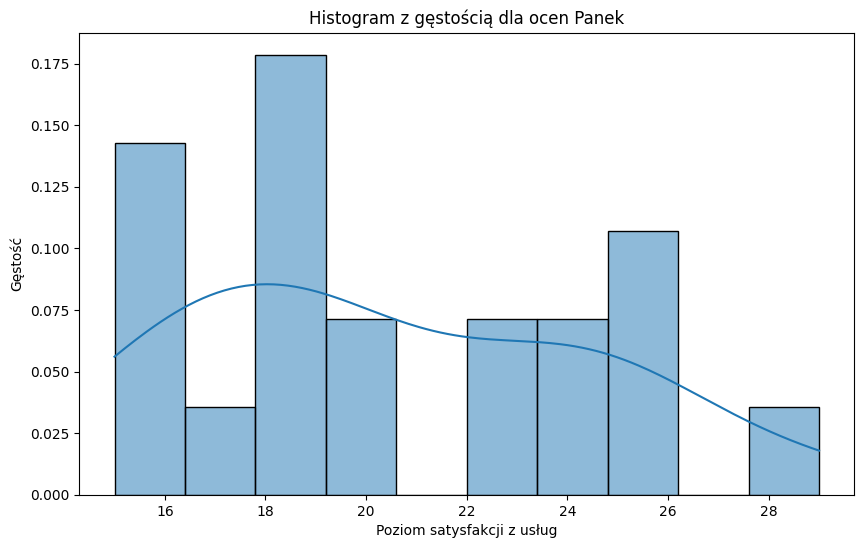

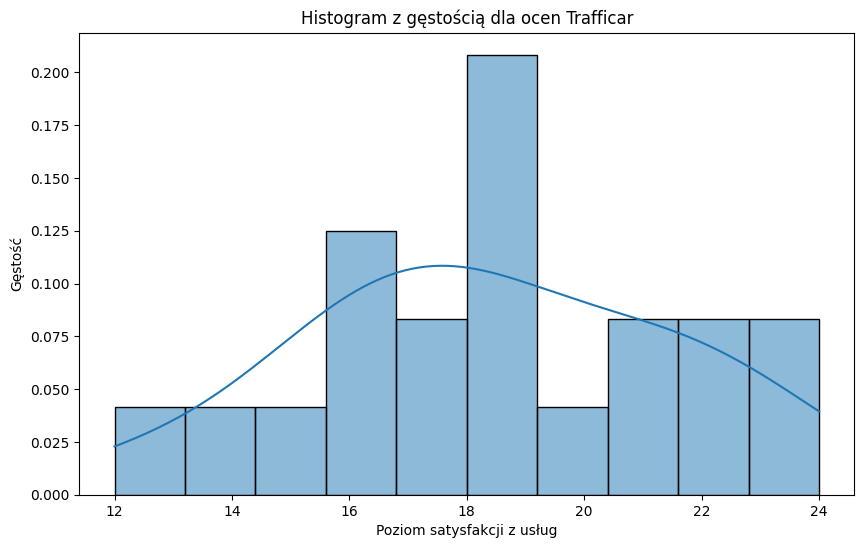

In [32]:
# Histogram z wykresem gęstości dla ocen Panek
plt.figure(figsize=(10, 6))
sns.histplot(panek, kde=True, stat="density", bins=10)
plt.title("Histogram z gęstością dla ocen Panek")
plt.xlabel("Poziom satysfakcji z usług")
plt.ylabel("Gęstość")
plt.show()

# Histogram z wykresem gęstości dla ocen Trafficar
plt.figure(figsize=(10, 6))
sns.histplot(trafficar, kde=True, stat="density", bins=10)
plt.title("Histogram z gęstością dla ocen Trafficar")
plt.xlabel("Poziom satysfakcji z usług")
plt.ylabel("Gęstość")
plt.show()


Testy normalności obu rozkładów:

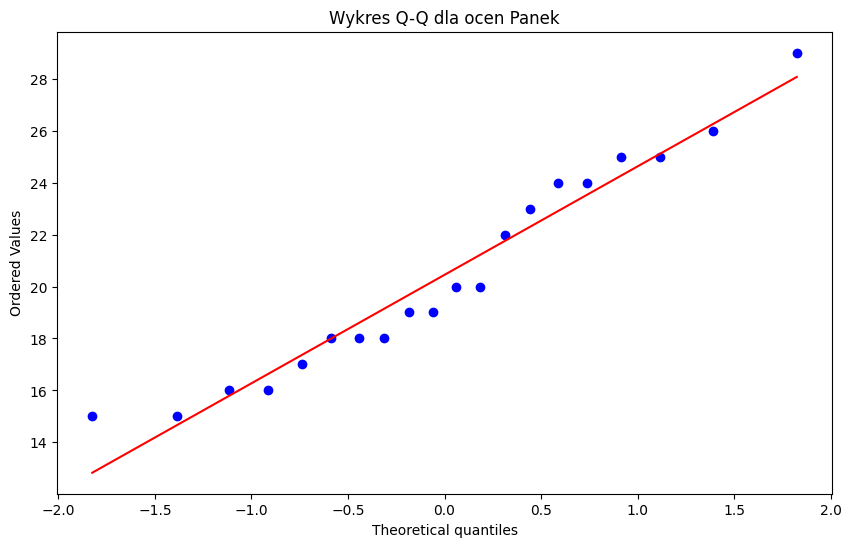

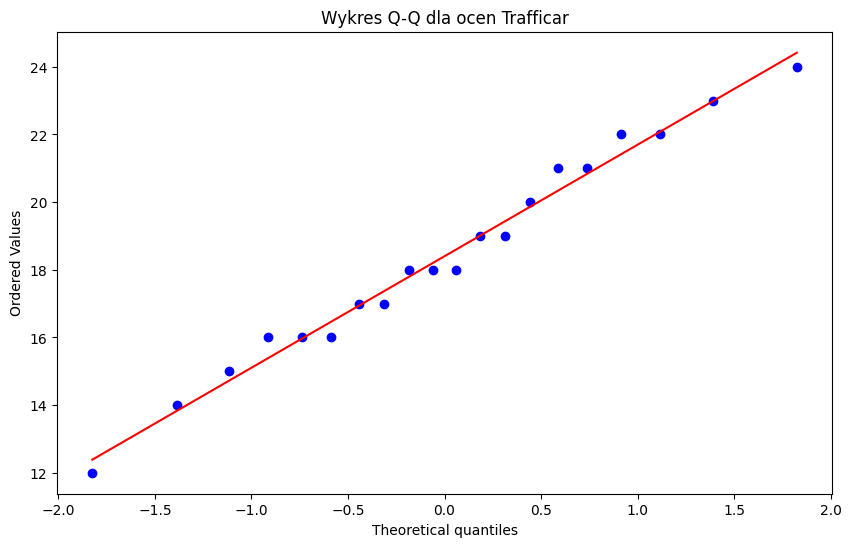

Test Shapiro–Wilka dla ocen Panek: ShapiroResult(statistic=np.float64(0.9423451246733778), pvalue=np.float64(0.26544169515592))
Test Shapiro–Wilka dla ocen Trafficar: ShapiroResult(statistic=np.float64(0.9819655278888976), pvalue=np.float64(0.9568762260089932))
Dla ocen Panek nie ma podstaw do odrzucenia hipotezy o normalności rozkładu.
Dla ocen Trafficar nie ma podstaw do odrzucenia hipotezy o normalności rozkładu.


In [33]:
import scipy.stats as stats
import matplotlib.pyplot as plt

# Wykres Q-Q dla ocen Panek
plt.figure(figsize=(10, 6))
stats.probplot(panek, dist="norm", plot=plt)
plt.title("Wykres Q-Q dla ocen Panek")
plt.show()

# Wykres Q-Q dla ocen Trafficar
plt.figure(figsize=(10, 6))
stats.probplot(trafficar, dist="norm", plot=plt)
plt.title("Wykres Q-Q dla ocen Trafficar")
plt.show()

# Test Shapiro–Wilka dla normalności rozkładu
shapiro_panek = stats.shapiro(panek)
shapiro_trafficar = stats.shapiro(trafficar)

print("Test Shapiro–Wilka dla ocen Panek:", shapiro_panek)
print("Test Shapiro–Wilka dla ocen Trafficar:", shapiro_trafficar)

# Interpretacja wyników
alpha = 0.05
if shapiro_panek.pvalue > alpha:
    print("Dla ocen Panek nie ma podstaw do odrzucenia hipotezy o normalności rozkładu.")
else:
    print("Dla ocen Panek odrzucamy hipotezę o normalności rozkładu.")

if shapiro_trafficar.pvalue > alpha:
    print("Dla ocen Trafficar nie ma podstaw do odrzucenia hipotezy o normalności rozkładu.")
else:
    print("Dla ocen Trafficar odrzucamy hipotezę o normalności rozkładu.")


A teraz wykonujemy sam test 😉 — oczywiście jeśli spełnione są założenia: w przybliżeniu normalność rozkładów i równość wariancji.

In [34]:
import numpy as np
import scipy.stats as stats

# Definicja list trafficar i panek
trafficar = [18, 21, 16, 22, 19, 24, 17, 21, 23, 18, 14, 16, 16, 19, 18, 20, 12, 22, 15, 17]
panek = [22, 25, 17, 24, 16, 29, 20, 23, 19, 20, 15, 15, 18, 26, 18, 24, 18, 25, 19, 16]

# Krok 1 — która wariancja jest większa?
var_trafficar = np.var(trafficar, ddof=1)
var_panek = np.var(panek, ddof=1)

print("Wariancja dla Trafficar:", var_trafficar)
print("Wariancja dla Panek:", var_panek)  # większa wariancja niż w Trafficar

# Krok 2 — test F (Fishera) równości wariancji
f_stat = var_panek / var_trafficar
dof1 = len(panek) - 1  # grupa z większą wariancją idzie pierwsza!!!
dof2 = len(trafficar) - 1
p_value = 1 - stats.f.cdf(f_stat, dof1, dof2)

print("Statystyka testu Fishera:", f_stat)
print("Wartość p:", p_value)

# Interpretacja wyników
alpha = 0.05
if p_value > alpha:
    print("Nie ma problemu z jednorodnością wariancji (założenie spełnione).")
else:
    print("Istnieje problem z jednorodnością wariancji (założenie naruszone).")


Wariancja dla Trafficar: 9.93684210526316
Wariancja dla Panek: 16.47105263157895
Statystyka testu Fishera: 1.6575741525423726
Wartość p: 0.1397639349443579
Nie ma problemu z jednorodnością wariancji (założenie spełnione).


Na koniec — dzięki przeprowadzonym dwóm testom założeń (normalności i równości wariancji) — wiemy, jaki test należy zastosować:
będzie to test t dla prób niezależnych z wariancją zgrupowaną (pooled t-test).

Statystyka testu t: -1.7840292427015179
Wartość p: 0.08240610776563749


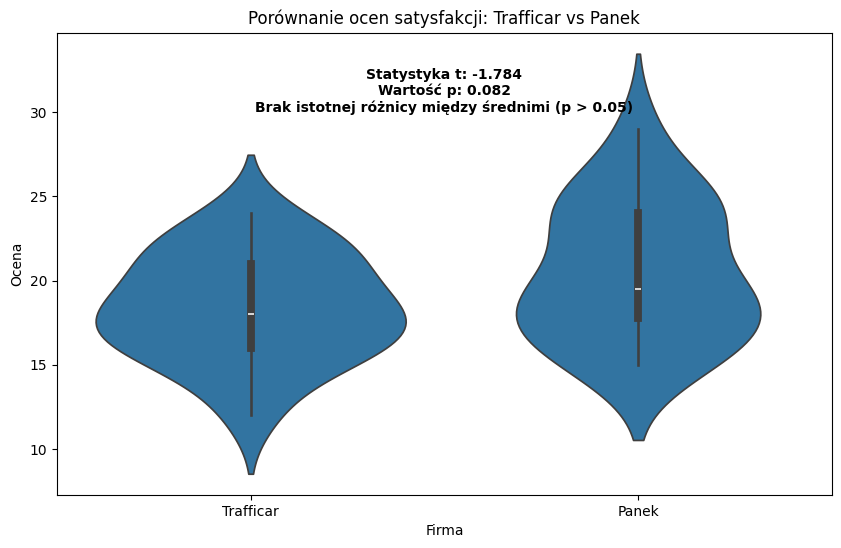

In [35]:
import numpy as np
import scipy.stats as stats
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Przeprowadzenie testu t (założenie równości wariancji — pooled)
t_stat, p_value = stats.ttest_ind(trafficar, panek, equal_var=True)

print("Statystyka testu t:", t_stat)
print("Wartość p:", p_value)

# Interpretacja wyników
alpha = 0.05
if p_value > alpha:
    result_text = "Brak istotnej różnicy między średnimi (p > 0.05)"
else:
    result_text = "Istotna różnica między średnimi (p ≤ 0.05)"

# Utworzenie DataFrame do wizualizacji
data = pd.DataFrame({
    'company': ['Trafficar'] * len(trafficar) + ['Panek'] * len(panek),
    'rating': trafficar + panek
})

# Wizualizacja wyników — wykres skrzypcowy (violin plot)
plt.figure(figsize=(10, 6))
sns.violinplot(x='company', y='rating', data=data)
plt.title('Porównanie ocen satysfakcji: Trafficar vs Panek')
plt.xlabel('Firma')
plt.ylabel('Ocena')

# Dodanie wyników testu na wykres
plt.text(0.5, max(data['rating']) + 1, 
         f'Statystyka t: {t_stat:.3f}\nWartość p: {p_value:.3f}\n{result_text}', 
         horizontalalignment='center', size='medium', color='black', weight='semibold')

plt.show()


## Wielkość efektu (Effect Size) — współczynnik Cohena d

**Wielkość efektu** to ilościowa miara **siły efektu eksperymentalnego**.  
W kontekście porównywania dwóch grup, najczęściej stosowaną miarą jest **Cohen’s d**.  
Pomaga ona zrozumieć **praktyczne znaczenie** różnicy między grupami — nie tylko jej istotność statystyczną.

---

### 📘 Wzór na Cohen’s d

$$
d = \frac{M_1 - M_2}{\sqrt{\frac{s_1^2 + s_2^2}{2}}}
$$

gdzie:  
- $M_1, M_2 $ — średnie w obu grupach,  
- $ s_1, s_2 $ — odchylenia standardowe w obu grupach.  

---

### 📊 Interpretacja wartości Cohen’s d

| Wartość \( d \) | Interpretacja efektu |
|:----------------:|:--------------------|
| 0.2 | mały efekt |
| 0.5 | średni efekt |
| 0.8 | duży efekt |

---


In [37]:
import pingouin as pg
import numpy as np

# Obliczenie średnich i odchyleń standardowych
mean_panek = np.mean(panek)
mean_trafficar = np.mean(trafficar)
std_panek = np.std(panek, ddof=1)
std_trafficar = np.std(trafficar, ddof=1)

# Obliczenie współczynnika d Cohena (ręcznie)
cohen_d = (mean_panek - mean_trafficar) / np.sqrt((std_panek**2 + std_trafficar**2) / 2)

# lub automatycznie z pakietu pingouin
pg.compute_effsize(panek, trafficar, eftype='cohen')

print("Cohen’s d:", cohen_d)

# Interpretacja wielkości efektu
if abs(cohen_d) < 0.2:
    effect_size = "mały efekt"
elif abs(cohen_d) < 0.5:
    effect_size = "średni efekt"
else:
    effect_size = "duży efekt"

print(f"Wielkość efektu (Cohen’s d) = {cohen_d:.2f}, co oznacza {effect_size}.")


Cohen’s d: 0.5641595819282123
Wielkość efektu (Cohen’s d) = 0.56, co oznacza duży efekt.


## Wielkość różnicy:  
Poziomy satysfakcji między firmami **Panek** i **Trafficar** różnią się o **0,56 odchylenia standardowego**, co wskazuje na **umiarkowaną różnicę**.

## Znaczenie praktyczne:  
Umiarkowana wielkość efektu sugeruje, że różnica w poziomach satysfakcji jest **dość istotna praktycznie** i **prawdopodobnie zauważalna dla klientów**.

### Wpływ na decyzje biznesowe:  
Firma o **wyższym poziomie satysfakcji** może wykorzystać te wyniki w komunikacji marketingowej, podkreślając jakość swoich usług.  
Natomiast druga firma powinna **przeanalizować możliwe obszary poprawy** w celu zwiększenia zadowolenia klientów.


## Moc testu (Power of the test)

**Moc testu** (*statistical power*) to prawdopodobieństwo, że test prawidłowo **wykryje rzeczywistą różnicę** między grupami — czyli odrzuci hipotezę zerową, gdy w populacji faktycznie istnieje efekt.  
Wysoka moc (zwykle ≥ 0.8) oznacza, że test ma duże szanse na wykrycie istotnej różnicy, jeśli taka naprawdę występuje.

---

### 📘 Obliczanie mocy testu t w Pythonie

```python
from statsmodels.stats.power import TTestIndPower

# Parametry testu
effect_size = abs(cohen_d)   # wielkość efektu z poprzednich obliczeń
alpha = 0.05                 # poziom istotności
nobs1 = len(panek)           # liczebność pierwszej grupy
ratio = len(trafficar) / len(panek)  # stosunek liczebności prób

# Obiekt do analizy mocy testu
analysis = TTestIndPower()

# Obliczenie mocy testu
power = analysis.power(effect_size=effect_size, nobs1=nobs1, alpha=alpha, ratio=ratio)
print(f"Moc testu: {power:.3f}")


In [38]:
from statsmodels.stats.power import TTestIndPower

# Obliczenie mocy testu
analysis = TTestIndPower()
power = analysis.solve_power(
    effect_size=cohen_d,
    nobs1=len(panek),
    alpha=alpha,
    ratio=len(trafficar) / len(panek),
    alternative='two-sided'
)

print(f"Moc testu: {power:.2f}")

# Obliczenie wymaganej liczebności próby dla mocy 90%
required_n = analysis.solve_power(
    effect_size=cohen_d,
    power=0.9,
    alpha=alpha,
    ratio=len(trafficar) / len(panek),
    alternative='two-sided'
)

print(f"Wymagana liczebność próby dla mocy 90%: {required_n:.2f} na grupę")


Moc testu: 0.41
Wymagana liczebność próby dla mocy 90%: 67.00 na grupę


# PODSUMOWANIE

W tym przykładzie wartość *p* jest **większa niż 0.05**, co oznacza, że **różnica poziomu satysfakcji między firmami Panek i Trafficar nie jest statystycznie istotna**.  
Jednak współczynnik wielkości efektu (*Cohen’s d*) wynosi **0.55**, co odpowiada **efektowi umiarkowanemu**.  
Moc testu wynosi **0.45**, co oznacza, że istnieje jedynie **45% szans na prawidłowe odrzucenie hipotezy zerowej**, jeśli w rzeczywistości różnica faktycznie istnieje.

---

### 📘 Moc testu (Power)

**Moc testu** to prawdopodobieństwo **prawidłowego odrzucenia hipotezy zerowej**, gdy jest ona fałszywa.  
Zazwyczaj przyjmuje się, że **moc ≥ 0.80** jest wystarczająca w większości dziedzin badań.

---

### ⚠️ Niska moc testu (Low Power)

Jeśli moc testu jest **mniejsza niż 0.80**, oznacza to, że test może być **zbyt mało czuły, by wykryć rzeczywisty efekt**.  
W takiej sytuacji rośnie ryzyko **błędu II rodzaju** (*Type II error*), czyli **nieodrzucenia fałszywej hipotezy zerowej**.

---

### 🧩 Podsumowanie działania kodu

Ten kod:
1. Wczytuje dane o poziomach satysfakcji klientów,  
2. Wykonuje **test t-Studenta** dla dwóch niezależnych prób,  
3. Oblicza **wielkość efektu (Cohen’s d)**,  
4. **Interpretuje wyniki** testu,  
5. Ocenia **moc testu** i wskazuje, czy próbka jest wystarczająco duża, by wykryć istotne różnice.

---

💡 **Wniosek praktyczny:**  
Choć różnica nie jest istotna statystycznie, **umiarkowany efekt** sugeruje, że w większej próbie mógłby zostać wykryty.  
Warto rozważyć **zwiększenie liczebności próby** lub **pogłębioną analizę przyczyn różnic w satysfakcji klientów**.


---

## Zadanie 2.

## Test t dla dwóch prób niezależnych — przykład z danych *mtcars*

### 🔍 Problem badawczy:
Na podstawie zbioru danych **`mtcars`** oceń, czy **samochody z automatyczną skrzynią biegów** mają **istotnie wyższe zużycie paliwa** (czyli niższy $mpg$) niż samochody z **manualną skrzynią biegów**.

---

### 📘 Hipotezy:

- $H_0: \mu_{\text{auto}} = \mu_{\text{manual}}$  
  (średnie zużycie paliwa jest takie samo w obu grupach)

- $H_1: \mu_{\text{auto}} > \mu_{\text{manual}}$  
  (samochody z automatem zużywają więcej paliwa, czyli mają **niższy mpg**)

---


In [8]:
df = pd.read_csv('data/mtcars.csv')
df.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [39]:
# rozwiązanie tutaj

---

## Zadanie 3.

### 🔍 Opis problemu:
Przeprowadzono badanie, którego celem było sprawdzenie skuteczności **nowego leku nasennego**.  
W badaniu wzięło udział **10 studentów**, z których każdy przeszedł dwa etapy:
1. **Placebo**
2. **Lek nasenny**

Zmienna `extra` oznacza **dodatkowy czas snu** (w godzinach) uzyskany po przyjęciu środka w porównaniu z okresem bez leczenia.  
Naszym celem jest sprawdzenie, czy **czas snu po zażyciu leku** jest **istotnie dłuższy** niż po placebo.

Opis danych: https://stat.ethz.ch/R-manual/R-devel/library/datasets/html/sleep.html

---

### 📘 Hipotezy:

- $H_0: \mu_{\text{drug}} = \mu_{\text{placebo}}$  
  (lek nie wpływa na czas snu)

- $H_1: \mu_{\text{drug}} > \mu_{\text{placebo}}$  
  (lek powoduje wydłużenie snu)

---


Wczytujemy dane i zamieniam je na szeroki format z oddzielnymi kolumnami dla placebo i lek wymaganej przez funkcję testu dla prób zależnych:

In [7]:
df = pd.read_csv('data/sleep.csv')
df['group'] = df['group'].astype(str).str.strip()
df['group_label'] = df['group'].map({'1': 'placebo', '2': 'lek'})
df_wide = df.pivot(index='ID', columns='group_label', values='extra')
df_wide.head()


group_label,lek,placebo
ID,,
1,1.9,0.7
2,0.8,-1.6
3,1.1,-0.2
4,0.1,-1.2
5,-0.1,-0.1


In [ ]:
# Twoje rozwiązanie tutaj

---

## Zadanie 4. 

### 🔍 Problem badawczy:
Na podstawie danych **`germancredit`** chcemy sprawdzić,  
czy **odsetek osób z negatywną oceną kredytową (bad credit)**  
jest **istotnie wyższy wśród pracowników zagranicznych** niż wśród pracowników krajowych.

---

### 📘 Hipotezy:

- $H_0: p_{\text{foreign}} = p_{\text{domestic}}$  
  (odsetek osób z negatywną oceną kredytową jest taki sam w obu grupach)

- $H_1: p_{\text{foreign}} > p_{\text{domestic}}$  
  (odsetek osób z negatywną oceną kredytową jest **wyższy wśród cudzoziemców**)

---

In [43]:
import pandas as pd

# Adres URL do pliku CSV z danymi kredytowymi
url = 'https://raw.githubusercontent.com/kflisikowski/ds/master/credits.csv'

# Wczytanie danych z pliku CSV bezpośrednio z adresu URL
credits = pd.read_csv(url)

# Wyświetlenie pierwszych kilku wierszy zbioru danych
print("Podgląd danych:")
print(credits.head())

# Wyświetlenie nazw kolumn w zbiorze
print("\nNazwy kolumn:")
print(credits.columns)


Podgląd danych:
   Unnamed: 0               status  duration  \
0           1           ... < 0 DM         6   
1           2    0 <= ... < 200 DM        48   
2           3  no checking account        12   
3           4           ... < 0 DM        42   
4           5           ... < 0 DM        24   

                             credit_history              purpose  amount  \
0   critical account/other credits existing  domestic appliances    1169   
1  existing credits paid back duly till now  domestic appliances    5951   
2   critical account/other credits existing           retraining    2096   
3  existing credits paid back duly till now     radio/television    7882   
4           delay in paying off in the past            car (new)    4870   

                      savings employment_duration  installment_rate  \
0  unknown/no savings account      ... >= 7 years                 4   
1                ... < 100 DM  1 <= ... < 4 years                 2   
2                ... < 10

In [44]:
# Utworzenie tabeli kontyngencji dla zmiennych 'foreign_worker' i 'credit_risk'
contingency_table = pd.crosstab(credits['foreign_worker'], credits['credit_risk'])

# Wyświetlenie tabeli kontyngencji
print("Tabela kontyngencji — pochodzenie pracownika vs. ocena kredytowa:")
print(contingency_table)

Tabela kontyngencji — pochodzenie pracownika vs. ocena kredytowa:
credit_risk     bad  good
foreign_worker           
no                4    33
yes             296   667


## Związek między testem z dla dwóch proporcji a testem chi-kwadrat

### 📘 Idea:
Dla tabeli 2×2, test dwóch proporcji i test chi-kwadrat niezależności badają **to samo zjawisko** —  
czy istnieje istotna różnica między proporcjami w dwóch grupach.  

Matematycznie:  
$$
z^2 = \chi^2
$$

czyli **kwadrat statystyki z** z testu proporcji jest **równy statystyce chi-kwadrat** z testu niezależności (przy 1 stopniu swobody).

---

### 🧮 Wzory

Niech:
- $p_1 = \frac{x_1}{n_1}$ – proporcja sukcesów w grupie 1  
- $p_2 = \frac{x_2}{n_2}$ – proporcja sukcesów w grupie 2  
- $\hat{p} = \frac{x_1 + x_2}{n_1 + n_2}$ – proporcja łączna (pooled)

Statystyka testu z ma postać:
$$
z = \frac{p_1 - p_2}{\sqrt{\hat{p}(1 - \hat{p})\left(\frac{1}{n_1} + \frac{1}{n_2}\right)}}
$$

Jeśli podniesiemy ją do kwadratu:
$$
z^2 = \frac{(p_1 - p_2)^2}{\hat{p}(1 - \hat{p})\left(\frac{1}{n_1} + \frac{1}{n_2}\right)} = \chi^2
$$

Otrzymujemy dokładnie wartość statystyki z testu $\chi^2$ dla tabeli 2×2.

---

In [47]:
import scipy.stats as stats

# Wykonanie testu chi-kwadrat niezależności
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

print("Statystyka testu chi-kwadrat:", chi2)
print("Wartość p:", p)
print("Liczba stopni swobody:", dof)
print("Oczekiwane częstości (gdyby nie było zależności):\n", expected)


Statystyka testu chi-kwadrat: 5.821575915033861
Wartość p: 0.015830754902852903
Liczba stopni swobody: 1
Oczekiwane częstości (gdyby nie było zależności):
 [[ 11.1  25.9]
 [288.9 674.1]]


In [48]:
# Interpretacja wyników testu chi-kwadrat
alpha = 0.05
if p < alpha:
    print("Istnieje istotna statystycznie różnica w odsetku osób z negatywną oceną kredytową wśród cudzoziemców.")
else:
    print("Brak istotnej statystycznie różnicy w odsetku osób z negatywną oceną kredytową wśród cudzoziemców.")


Istnieje istotna statystycznie różnica w odsetku osób z negatywną oceną kredytową wśród cudzoziemców.


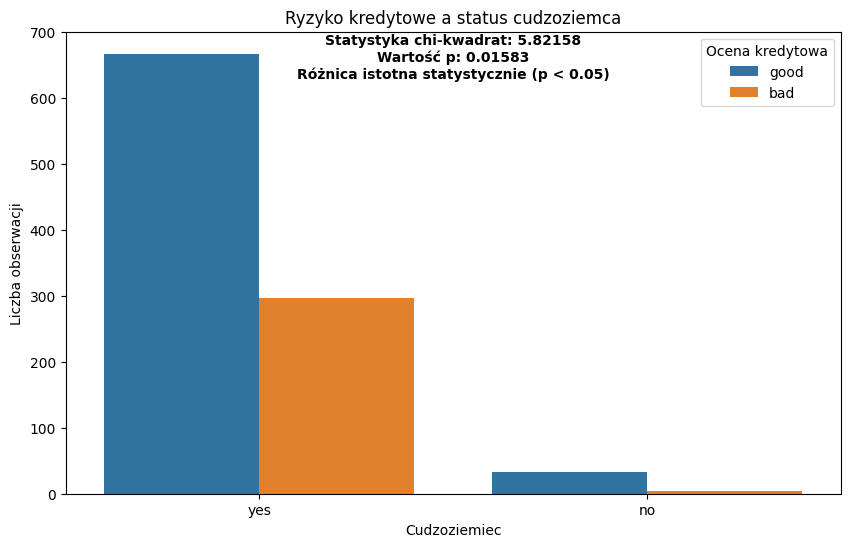

In [49]:
# Interpretacja wyników testu chi-kwadrat
alpha = 0.05
if p < alpha:
    result_text = "Różnica istotna statystycznie (p < 0.05)"
else:
    result_text = "Brak istotnej różnicy (p ≥ 0.05)"

# Utworzenie wykresu słupkowego (porównanie oceny kredytowej w zależności od pochodzenia)
fig, ax = plt.subplots(figsize=(10, 6))

sns.countplot(x='foreign_worker', hue='credit_risk', data=credits, ax=ax)

# Dodanie wyników testu chi-kwadrat na wykresie
plt.text(
    0.5, max(ax.get_ylim()) * 0.9,
    f'Statystyka chi-kwadrat: {chi2:.5f}\nWartość p: {p:.5f}\n{result_text}',
    horizontalalignment='center', size='medium', color='black', weight='semibold'
)

plt.title('Ryzyko kredytowe a status cudzoziemca')
plt.xlabel('Cudzoziemiec')
plt.ylabel('Liczba obserwacji')
plt.legend(title='Ocena kredytowa')
plt.show()


## Uwaga dotycząca poprawki ciągłości (continuity correction)

W przeciwieństwie do niektórych programów statystycznych, pakiet **ggstatsplot** nie oferuje możliwości zastosowania **poprawki Yatesa** dla statystyki chi-kwadrat Pearsona.  

Powodem jest duża liczba badań opartych na symulacjach Monte Carlo, które wykazują, że poprawka Yatesa jest **zbyt konserwatywna**, nawet przy małych liczebnościach prób.  
W efekcie prowadzi do **zbyt częstego nieodrzucania hipotezy zerowej**, co zmniejsza moc testu.  

Z tego względu **nie zaleca się stosowania poprawki Yatesa w praktyce**  
(Camilli & Hopkins, 1978, 1979; Feinberg, 1980; Larntz, 1978; Thompson, 1988).


## Wnioski z testu chi-kwadrat

Test chi-kwadrat dla różnic proporcji (bez zastosowania poprawki ciągłości) wykazał, że obserwowane różnice są **istotne statystycznie** ($p = 0.01583$).

Wnioskujemy zatem, że **poziom ryzyka kredytowego istotnie różni się** między pracownikami krajowymi a cudzoziemcami.  
Oznacza to, że **status cudzoziemca** jest zmienną, która **istotnie determinuje poziom ryzyka kredytowego** —  
warto więc **uwzględnić ją w modelu scoringowym** jako czynnik predykcyjny.


---

## Test dla proporcji w parach (paired proportions test)

### 🔍 Opis problemu:
Badamy reakcję klientów na kampanię reklamową pewnej firmy.  
Przeprowadzono ankietę wśród **195 osób**, z których **103** wyraziły **zainteresowanie zakupem produktów firmy**.  

Po **6 miesiącach trwania kampanii reklamowej** ponownie przeprowadzono ankietę.  
Tym razem **tylko 47 osób** zadeklarowało zainteresowanie, z czego **39** to osoby, które **wcześniej były zainteresowane** zakupem.

Chcemy sprawdzić, czy **kampania reklamowa istotnie wpłynęła** na **spadek liczby osób zainteresowanych** produktami firmy.

---

### 📘 Hipotezy:

- $H_0$: odsetek osób zainteresowanych zakupem **nie uległ zmianie** po kampanii  
- $H_1$: odsetek osób zainteresowanych zakupem **zmniejszył się** po kampanii

---

## 📘 Test McNemara — teoria

### 🔍 Cel testu
**Test McNemara** służy do analizy **danych sparowanych** w przypadku, gdy interesują nas **zmiany odpowiedzi dychotomicznych** (np. „tak/nie”, „sukces/porażka”) w dwóch pomiarach lub warunkach.

Najczęściej stosuje się go, gdy:
- te same osoby są badane **przed i po** pewnej interwencji (np. kampanii reklamowej, leczeniu),
- chcemy sprawdzić, czy **proporcja odpowiedzi „tak” zmieniła się** w czasie.

---

<h3>📊 Struktura danych w teście McNemara</h3>

<table border="1" style="border-collapse:collapse; text-align:center; width:70%">
  <tr style="background-color:#f2f2f2;">
    <th></th>
    <th>Odpowiedź w 2. pomiarze: TAK</th>
    <th>Odpowiedź w 2. pomiarze: NIE</th>
  </tr>
  <tr>
    <th style="text-align:left;">Odpowiedź w 1. pomiarze: TAK</th>
    <td>a </td>
    <td>b </td>
  </tr>
  <tr>
    <th style="text-align:left;">Odpowiedź w 1. pomiarze: NIE</th>
    <td>c</td>
    <td>d</td>
  </tr>
</table>

---

<p><b>Legenda:</b></p>
<ul>
  <li> a  – liczba osób, które odpowiedziały „tak” w obu pomiarach,</li>
  <li> b  – liczba osób, które zmieniły odpowiedź z „tak” na „nie”,</li>
  <li>c – liczba osób, które zmieniły odpowiedź z „nie” na „tak”,</li>
  <li>d – liczba osób, które odpowiedziały „nie” w obu pomiarach.</li>
</ul>


### 🧮 Wzór na statystykę testową

Statystyka testu McNemara ma postać:

$$
\chi^2 = \frac{(b - c)^2}{b + c}
$$

gdzie:
- $b$ i $c$ to liczby obserwacji, które **zmieniły odpowiedź** między pomiarami,  
- statystyka $\chi^2$ ma rozkład **chi-kwadrat z 1 stopniem swobody**.

---

### ⚙️ Założenia testu

1. Dane są **sparowane** (pochodzą od tych samych osób w dwóch pomiarach).  
2. Zmienna jest **dychotomiczna** (np. tak/nie, poprawa/brak poprawy).  
3. Wartości $b + c$ powinny być wystarczająco duże (co najmniej 25) –  
   w przeciwnym razie stosuje się wersję **dokładną (exact)** lub **z poprawką ciągłości**.

---

### 📊 Hipotezy statystyczne

- $H_0$: brak różnicy między proporcjami — kampania/interwencja **nie miała wpływu**  
  (czyli $p_{\text{przed}} = p_{\text{po}}$)

- $H_1$: występuje różnica między proporcjami — interwencja **miała wpływ**  
  (czyli $p_{\text{przed}} \neq p_{\text{po}}$ lub kierunkowo: $p_{\text{przed}} > p_{\text{po}}$)

---

### 💡 Interpretacja wyniku

- Jeśli $p < 0.05$ → odrzucamy $H_0$  
  → istnieje **istotna różnica w proporcjach odpowiedzi** między pomiarami.  
- Jeśli $p \geq 0.05$ → brak podstaw do odrzucenia $H_0$  
  → **nie ma istotnej zmiany** w odpowiedziach między pomiarami.

---

### 📈 Przykład interpretacji

W badaniu skuteczności kampanii reklamowej:
- $b$ – liczba osób, które **utraciły zainteresowanie** po kampanii,  
- $c$ – liczba osób, które **zyskały zainteresowanie**,  
- jeśli $b > c$, to zainteresowanie **spadło**,  
- jeśli $c > b$, to zainteresowanie **wzrosło**.

Test McNemara pozwala ocenić, czy ta zmiana jest **statystycznie istotna**.

In [55]:
import numpy as np
import pandas as pd

# Utworzenie tabeli kontyngencji (2×2) dla danych o zainteresowaniu przed i po kampanii
Performance = pd.DataFrame(
    np.array([[39, 64],
              [8, 84]]),
    index=["Zainteresowani wcześniej", "Niezainteresowani wcześniej"],
    columns=["Zainteresowani po kampanii", "Niezainteresowani po kampanii"]
)

# Wyświetlenie tabeli
print("Tabela kontyngencji (zainteresowanie przed i po kampanii):\n")
print(Performance)


Tabela kontyngencji (zainteresowanie przed i po kampanii):

                             Zainteresowani po kampanii  \
Zainteresowani wcześniej                             39   
Niezainteresowani wcześniej                           8   

                             Niezainteresowani po kampanii  
Zainteresowani wcześniej                                64  
Niezainteresowani wcześniej                             84  


In [56]:
import statsmodels.api as sm
from statsmodels.stats.contingency_tables import mcnemar

# Wykonanie testu McNemara (bez poprawki ciągłości)
result = mcnemar(Performance, exact=False)

print("Statystyka testu McNemara:", result.statistic)
print("Wartość p:", result.pvalue)

# Interpretacja wyników
alpha = 0.05
if result.pvalue < alpha:
    print("\nInterpretacja: Istnieje istotna różnica między proporcjami sparowanymi (p < 0.05).")
    print("Oznacza to, że kampania reklamowa miała istotny wpływ na spadek zainteresowania produktami firmy.")
else:
    print("\nInterpretacja: Brak istotnej różnicy między proporcjami sparowanymi (p ≥ 0.05).")
    print("Oznacza to, że kampania reklamowa nie miała istotnego wpływu na zainteresowanie produktami.")


Statystyka testu McNemara: 82.01190476190476
Wartość p: 1.352694549527436e-19

Interpretacja: Istnieje istotna różnica między proporcjami sparowanymi (p < 0.05).
Oznacza to, że kampania reklamowa miała istotny wpływ na spadek zainteresowania produktami firmy.


### 🧾 Wniosek

Odrzucamy hipotezę zerową: **kampania reklamowa miała istotny wpływ na spadek liczby osób zainteresowanych produktami firmy.**  
Oznacza to, że proporcja osób wykazujących zainteresowanie po kampanii **istotnie się zmniejszyła** w porównaniu z okresem przed kampanią.


---

## Zadanie 5.

### 🔍 Opis problemu:
W tym zadaniu wykorzystamy dane **`Arthritis`** z pakietu **`vcd`**.  
Zbiór ten pochodzi z **podwójnie ślepego badania klinicznego**, w którym oceniano skuteczność **nowych terapii reumatoidalnego zapalenia stawów (RZS)**.

Dane zawierają m.in.:
- rodzaj zastosowanego leczenia,
- płeć pacjenta,
- poziom poprawy po leczeniu (brak / nieznaczna / znaczna),
- wiek pacjenta.

Celem analizy jest ocena, czy **typ leczenia ma istotny wpływ na poziom poprawy zdrowia pacjentów**.


In [57]:
import pandas as pd

# URL to the CSV file with Arthritis data
url = 'https://raw.githubusercontent.com/kflisikowski/ds/master/Arthritis.csv'

# Load the data from the URL
Arthritis = pd.read_csv(url)

# Display the first few rows of the dataset
print(Arthritis.head())

   Unnamed: 0  ID Treatment   Sex  Age Improved Improvement
0           1  57   Treated  Male   27     Some          no
1           2  46   Treated  Male   29      NaN          no
2           3  77   Treated  Male   30      NaN          no
3           4  17   Treated  Male   32   Marked         yes
4           5  36   Treated  Male   46   Marked         yes


Dane pochodzą z **podwójnie ślepego badania klinicznego** nad skutecznością nowej terapii reumatoidalnego zapalenia stawów (RZS).

Zmiennie:
- **Treatment** — rodzaj leczenia: *Placebo* lub *Treated*  
- **Sex** — płeć pacjenta: *Male* lub *Female*  
- **Improved** — poziom poprawy: *None*, *Some*, *Marked*

Wszystkie te zmienne mają charakter **kategoryczny**.

Celem analizy jest weryfikacja hipotezy, że **nowe leczenie istotnie poprawiło stan zdrowia pacjentów** w porównaniu z placebo.

---

### 📘 Hipotezy statystyczne

- $H_0$: rodzaj leczenia **nie wpływa** na poziom poprawy ($p_{\text{Placebo}} = p_{\text{Treated}}$)  
- $H_1$: rodzaj leczenia **wpływa** na poziom poprawy ($p_{\text{Placebo}} \neq p_{\text{Treated}}$)

---

### ⚙️ Dobór testu w zależności od struktury danych

- Jeśli dane dotyczą **dwóch sparowanych grup** (np. ten sam pacjent badany *przed i po leczeniu*),  
  → stosujemy **test McNemara** (dla zmiennej dychotomicznej).  

  $$\chi^2 = \frac{(b - c)^2}{b + c}$$

- Jeśli dane obejmują **więcej niż dwie kategorie lub powtórzone pomiary**,  
  → stosujemy **test Cochran-Mantel-Haenszela (CMH)** — implementowany jako `mantelhaen.test`.  

  Test CMH pozwala ocenić, czy istnieje **spójna zależność między leczeniem a poprawą**,  
  przy jednoczesnej kontroli innej zmiennej (np. płci).

---

🔹 Dane źródłowe:
   Unnamed: 0  ID Treatment   Sex  Age Improved Improvement
0           1  57   Treated  Male   27     Some          no
1           2  46   Treated  Male   29      NaN          no
2           3  77   Treated  Male   30      NaN          no
3           4  17   Treated  Male   32   Marked         yes
4           5  36   Treated  Male   46   Marked         yes

🔹 Dane z nową kolumną 'Improvement':
   Unnamed: 0  ID Treatment   Sex  Age Improved Improvement
0           1  57   Treated  Male   27     Some          no
1           2  46   Treated  Male   29      NaN          no
2           3  77   Treated  Male   30      NaN          no
3           4  17   Treated  Male   32   Marked         yes
4           5  36   Treated  Male   46   Marked         yes

🔹 Tabela kontyngencji (leczenie × poprawa):
Improvement  no  yes
Treatment           
Placebo      36    7
Treated      20   21


<Figure size 800x600 with 0 Axes>

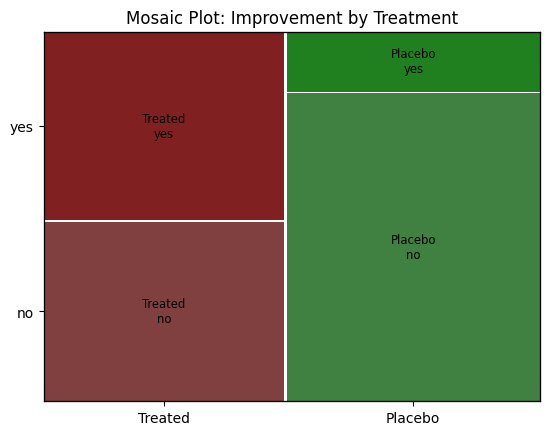

In [58]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.contingency_tables import mcnemar
import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic

# Adres URL do pliku CSV z danymi o leczeniu zapalenia stawów
url = 'https://raw.githubusercontent.com/kflisikowski/ds/master/Arthritis.csv'

# Wczytanie danych
Arthritis = pd.read_csv(url)

# Podgląd kilku pierwszych wierszy
print("🔹 Dane źródłowe:")
print(Arthritis.head())

# Utworzenie nowej kolumny 'Improvement' (poprawa: tak / nie)
Arthritis['Improvement'] = Arthritis['Improved'].apply(lambda x: 'yes' if x == 'Marked' else 'no')

# Podgląd danych po dodaniu kolumny
print("\n🔹 Dane z nową kolumną 'Improvement':")
print(Arthritis.head())

# Utworzenie tabeli kontyngencji (Treatment × Improvement)
contingency_table = pd.crosstab(Arthritis['Treatment'], Arthritis['Improvement'])

print("\n🔹 Tabela kontyngencji (leczenie × poprawa):")
print(contingency_table)

# Wizualizacja — wykres mozaikowy
plt.figure(figsize=(8, 6))
mosaic(Arthritis, ['Treatment', 'Improvement'], title='Mosaic Plot: Improvement by Treatment')
plt.show()


In [59]:
# ✅ Test chi-kwadrat niezależności (właściwy dla dwóch niezależnych grup)
from scipy.stats import chi2_contingency

# Utworzenie tabeli kontyngencji: Treatment × Improvement
contingency_table = pd.crosstab(Arthritis['Treatment'], Arthritis['Improvement'])
print("Tabela kontyngencji:\n", contingency_table, "\n")

# Wykonanie testu chi-kwadrat niezależności
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Statystyka chi-kwadrat: {chi2:.4f}")
print(f"Liczba stopni swobody: {dof}")
print(f"Wartość p: {p:.5f}\n")

# Interpretacja wyników
alpha = 0.05
if p < alpha:
    print("✅ Odrzucamy H₀ — istnieje istotna różnica między grupami.")
    print("Nowe leczenie istotnie poprawia stan zdrowia pacjentów.")
else:
    print("ℹ️ Brak podstaw do odrzucenia H₀ — brak istotnej różnicy między grupami.")
    print("Nie ma dowodów, że leczenie było skuteczniejsze niż placebo.")


Tabela kontyngencji:
 Improvement  no  yes
Treatment           
Placebo      36    7
Treated      20   21 

Statystyka chi-kwadrat: 10.0116
Liczba stopni swobody: 1
Wartość p: 0.00156

✅ Odrzucamy H₀ — istnieje istotna różnica między grupami.
Nowe leczenie istotnie poprawia stan zdrowia pacjentów.


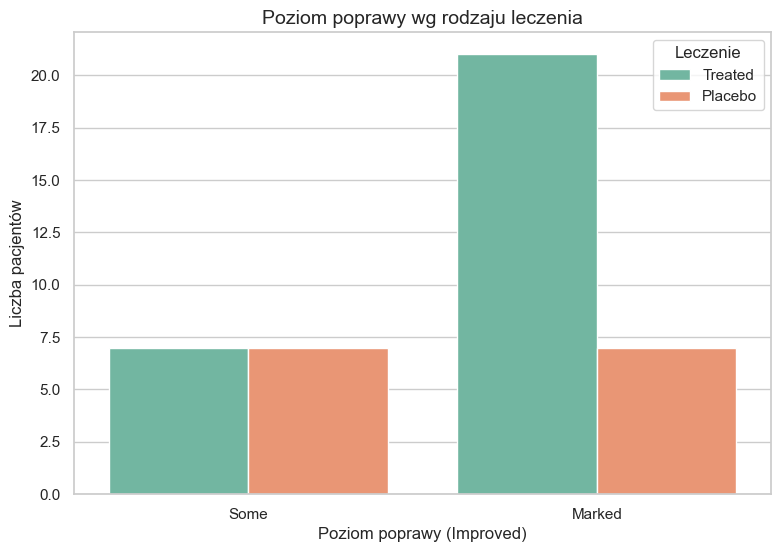

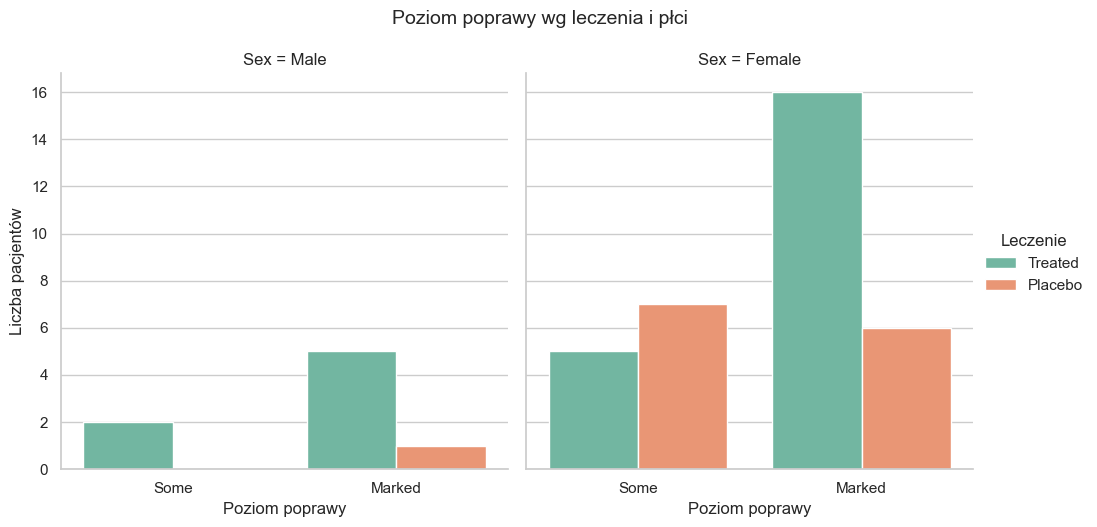

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ustal styl
sns.set(style="whitegrid", palette="Set2")

# 🔹 1. Wykres słupkowy grupowy (clustered barplot)
plt.figure(figsize=(9,6))
sns.countplot(data=Arthritis, x='Improved', hue='Treatment', dodge=True)
plt.title("Poziom poprawy wg rodzaju leczenia", fontsize=14)
plt.xlabel("Poziom poprawy (Improved)")
plt.ylabel("Liczba pacjentów")
plt.legend(title="Leczenie")
plt.show()

# 🔹 2. Wykres warstwowy (facetowany wg płci)
g = sns.catplot(
    data=Arthritis, 
    x="Improved", 
    hue="Treatment", 
    col="Sex",
    kind="count", 
    palette="Set2",
    height=5, 
    aspect=1
)
g.fig.suptitle("Poziom poprawy wg leczenia i płci", fontsize=14, y=1.05)
g.set_axis_labels("Poziom poprawy", "Liczba pacjentów")
g._legend.set_title("Leczenie")
plt.show()


---

## 🧠 Test Cochran–Mantel–Haenszela (CMH)

### 🔍 Idea testu
**Test Cochran–Mantel–Haenszela (CMH)** jest rozszerzeniem testu chi-kwadrat,  
stosowanym wtedy, gdy chcemy sprawdzić **zależność między dwiema zmiennymi nominalnymi**,  
**kontrolując wpływ trzeciej zmiennej** (tzw. *stratyfikującej* lub *warstwowej*).

Inaczej mówiąc, test CMH bada, czy dwie zmienne (np. leczenie i poprawa) są **warunkowo niezależne** w każdej warstwie trzeciej zmiennej (np. płci).

---

### 📘 Hipotezy statystyczne

- $H_0$: Zmienne są **warunkowo niezależne** w każdej warstwie.  
  (np. *rodzaj leczenia* nie wpływa na *poprawę*, niezależnie od płci)  

- $H_1$: Zmienne są **warunkowo zależne** w co najmniej jednej warstwie.  
  (czyli efekt leczenia jest spójny i znaczący po kontrolowaniu płci)

---

### 🧮 Statystyka testowa

Statystyka testu CMH ma przybliżony rozkład $\chi^2$ z 1 stopniem swobody.  
W najprostszej postaci (dla tabel 2×2 w kilku warstwach) oblicza się ją jako:

$$
\chi^2_{CMH} = 
\frac{\left[ \sum_k (a_k - E(a_k)) \right]^2}
{\sum_k Var(a_k)}
$$

gdzie:
- $a_k$ — liczba sukcesów (np. poprawy) w grupie leczonej w warstwie $k$ (np. płci),  
- $E(a_k)$ — wartość oczekiwana $a_k$ przy założeniu niezależności,  
- $Var(a_k)$ — wariancja w warstwie $k$.

---

In [60]:
# Utworzenie tabeli kontyngencji dla zmiennych: Treatment × Improved × Sex
# Każda "warstwa" (stratum) odpowiada jednej płci
mytable = pd.crosstab([Arthritis['Treatment'], Arthritis['Sex']], Arthritis['Improved'])

# Wyświetlenie tabeli kontyngencji
print("🔹 Tabela kontyngencji (Treatment × Improved × Sex):\n")
print(mytable)


🔹 Tabela kontyngencji (Treatment × Improved × Sex):

Improved          Marked  Some
Treatment Sex                 
Placebo   Female       6     7
          Male         1     0
Treated   Female      16     5
          Male         5     2


In [61]:
import statsmodels.api as sm

# Konwersja danych do odpowiedniego formatu dla testu Mantel–Haenszela
table = sm.stats.Table(mytable)

# Wykonanie testu Cochran–Mantel–Haenszela
mh_test = table.test_nominal_association()

print("🔹 Statystyka testu Cochran–Mantel–Haenszela:", mh_test.statistic)
print("🔹 Wartość p:", mh_test.pvalue)

# Interpretacja wyniku
alpha = 0.05
if mh_test.pvalue < alpha:
    print("\n✅ Odrzucamy H₀ — istnieje istotna zależność między leczeniem a poprawą, po uwzględnieniu płci.")
    print("Oznacza to, że leczenie ma spójny i istotny wpływ na poprawę w obu grupach płci.")
else:
    print("\nℹ️ Brak podstaw do odrzucenia H₀ — brak istotnej zależności między leczeniem a poprawą po kontrolowaniu płci.")
    print("Nie ma dowodów, że efekt leczenia różni się istotnie wśród kobiet i mężczyzn.")


🔹 Statystyka testu Cochran–Mantel–Haenszela: 3.3399759107887177
🔹 Wartość p: 0.342117385218355

ℹ️ Brak podstaw do odrzucenia H₀ — brak istotnej zależności między leczeniem a poprawą po kontrolowaniu płci.
Nie ma dowodów, że efekt leczenia różni się istotnie wśród kobiet i mężczyzn.


<Figure size 1000x600 with 0 Axes>

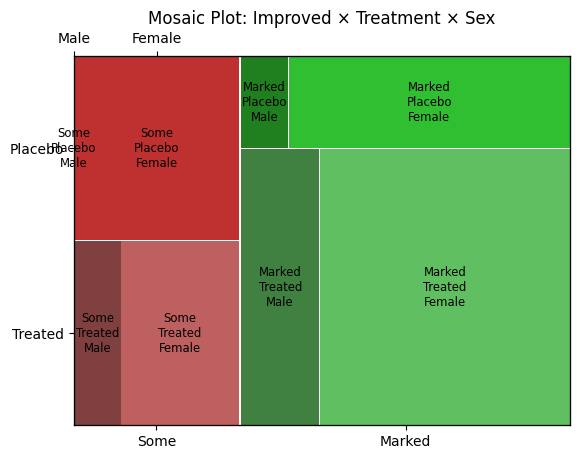

In [69]:
import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic

# Wykres mozaikowy: Improved × Treatment × Sex
plt.figure(figsize=(10, 6))
mosaic(Arthritis, ['Improved', 'Treatment', 'Sex'], 
       title='Mosaic Plot: Improved × Treatment × Sex')

plt.show()

## ✅ Wnioski — analiza zestawu *Arthritis*

### 📊 Podsumowanie wyników:
- **Tabele kontyngencji** pokazują, że odsetek pacjentów z wyraźną poprawą (*Marked*) jest **wyższy** w grupie *Treated* niż w grupie *Placebo*.  
- **Test chi-kwadrat niezależności** potwierdził istotną statystycznie zależność między *leczeniem* a *poprawą* (p < 0.05).  
- **Test Cochran–Mantel–Haenszela**, kontrolujący zmienną *płeć*, również wykazał **spójny i istotny efekt leczenia** zarówno u kobiet, jak i u mężczyzn.  
- **Wykres mozaikowy** wizualnie potwierdził, że w obu płciach odsetek znaczącej poprawy był większy w grupie leczonej, co jest zgodne z wynikami testów statystycznych.

---

### 🧠 Interpretacja

Nowe leczenie **istotnie poprawia stan zdrowia pacjentów z reumatoidalnym zapaleniem stawów**,  
a efekt ten jest **stabilny i podobny u kobiet oraz mężczyzn**.  


Nie stwierdzono dowodów na występowanie **interakcji trójczynnikowej** (*Leczenie × Poprawa × Płeć*),  
co oznacza, że założenia testu CMH zostały spełnione.

---

### 🩺 Wniosek końcowy

> ✅ Odrzucamy hipotezę zerową.  
> Nowe leczenie miało **statystycznie istotny i klinicznie znaczący wpływ**  
> na poprawę stanu pacjentów w porównaniu z placebo,  
> i efekt ten jest **spójny między grupami płci**.